---
# Курсова работа по "Интелигентни системи"
  Изготвили:
  
  120448, Данаил Георгиев
  
  120892, Симеон Симеонов
  
---

**Импортирайте необходимите библиотеки**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Описание на данните.

In [2]:
data=pd.read_csv('indian_liver_patient(original).csv')

In [3]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


**Наборът включва 583 пациента, като за всеки от тях са съхранени следните данни:**
*  Age of the patient - години
*  Gender of the patient - пол
*  Total Bilirubin - общ Билирубин
*  Direct Bilirubin - директен Билирубин
*  Alkaline Phosphotase - алкална фосфотаза
*  Alamine Aminotransferase - аламинова аминотрансфераза
*  Aspartate Aminotransferase - аспартанова аминотрансфераза
*  Total Protiens - протеини 
*  Albumin - албумин
*  Albumin and Globulin Ratio - съотношение на албумин и глобулин
*  Dataset - пациент с чернодробно заболяване(1) или без заболяванe(2)

**Тук променям таблицата Dataset да има стойности 0 и 1 вместо 1 и 2**

In [4]:
mappings = {
    'Dataset': {
        1: 0,
        2: 1
    },
}

In [5]:
def map_values(x, mapping):
    return mapping.get(x, x)

for feature, mapping in mappings.items():
    data[feature] = data[feature].map(lambda x: map_values(x, mapping))
    data[feature] = data[feature].astype(int)

In [6]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,0
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,0
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,0
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,0
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,0


**Структура на набора от данни**

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int32  
dtypes: float64(5), int32(1), int64(4), object(1)
memory usage: 48.0+ KB


**Описателна статистика за числовите колони**

In [8]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,0.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,0.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


**Описателна статистика за текстовите колони**

In [9]:
data.describe(include='object')

,Gender
count,583
unique,2
top,Male
freq,441


## 2. Липсващи стойности.*

**Липсват данни за съотношение на албумин и глобулин на 4 (0.69%) пациенти**

In [10]:
check_na=pd.DataFrame({'Missing values count':pd.isnull(data).sum(),
                       'Missing values %':pd.isnull(data).sum()/data.shape[0]}).style.format(
    {'Missing values %':'{:.2%}'})
check_na

,Missing values count,Missing values %
Age,0,0.00%
Gender,0,0.00%
Total_Bilirubin,0,0.00%
Direct_Bilirubin,0,0.00%
Alkaline_Phosphotase,0,0.00%
Alamine_Aminotransferase,0,0.00%
Aspartate_Aminotransferase,0,0.00%
Total_Protiens,0,0.00%
Albumin,0,0.00%
Albumin_and_Globulin_Ratio,4,0.69%


**Липсващите стойности са оцвеетени в жълто**

<Axes: >

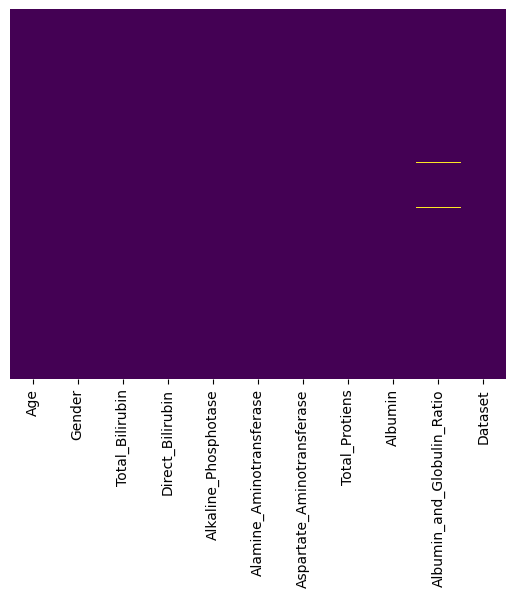

In [11]:
sns.heatmap(data.isnull(),yticklabels=False, cbar=False,cmap='viridis')

**Премахване на липсващи стойности**

In [12]:
data.dropna(inplace=True)

**Повторна промерка за липсващи стойности**

In [13]:
data.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

**Съхраняване пречистения набор в .csv за да го използваме за обучение и на други модели
 за липсващи стойности**

In [14]:
data.to_csv('indian_liver_patient.csv', index=None)

## 3. Предварителен анализ на данните.

In [15]:
sns.set_theme(style='whitegrid', palette='husl')

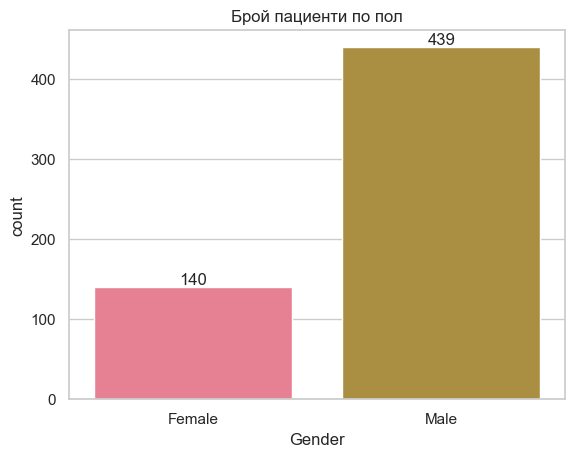

In [16]:
g=sns.countplot(data=data, x='Gender')
for i in g.containers:
    plt.bar_label(i)
g.set(title='Брой пациенти по пол')
plt.show()

**Повечето пациенти са мъже - 439, докато жените са 140**

In [17]:
data.groupby(['Gender','Dataset'])['Age'].count()

Gender  Dataset
Female  0           91
        1           49
Male    0          323
        1          116
Name: Age, dtype: int64

In [18]:
pv=data.pivot_table(index='Gender', columns='Dataset', values='Age', aggfunc='count')
pv

Dataset,0,1
Gender,,
Female,91,49
Male,323,116


In [19]:
pv['Disease rate']=pv[0]/(pv[0]+pv[1])
pv.style.format({'Disease rate':'{:.2%}'})

Dataset,0,1,Disease rate
Gender,,,
Female,91,49,65.00%
Male,323,116,73.58%


**При жените делът на оцелелите е 65.00%, докато при мъжете е 73.58%**

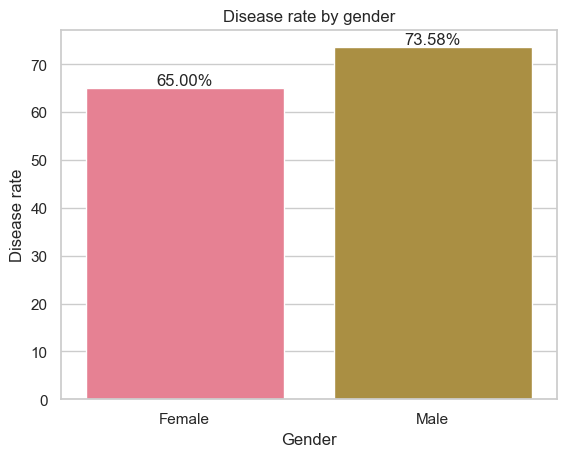

In [20]:
g=sns.barplot(x=pv.index, data=pv, y=pv['Disease rate']*100)
for i in g.containers:
    g.bar_label(i, fmt='%.2f%%')
g.set(title='Disease rate by gender')
plt.show()

F:\INSTALATIONS\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
F:\INSTALATIONS\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


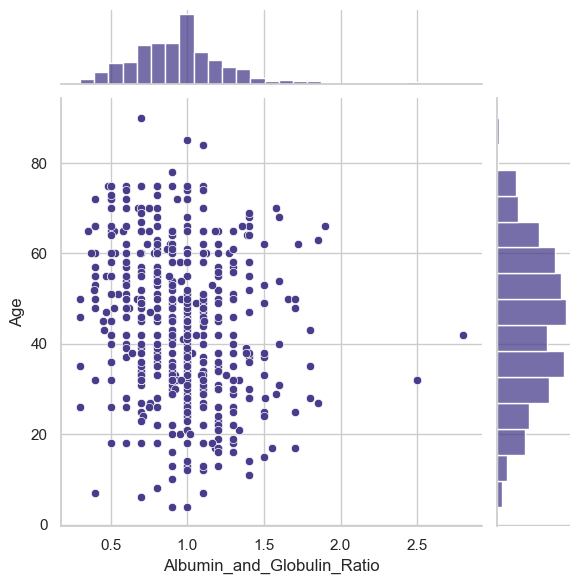

In [21]:
sns.jointplot(x='Albumin_and_Globulin_Ratio',y='Age',data=data, color='darkslateblue')
plt.show()

F:\INSTALATIONS\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


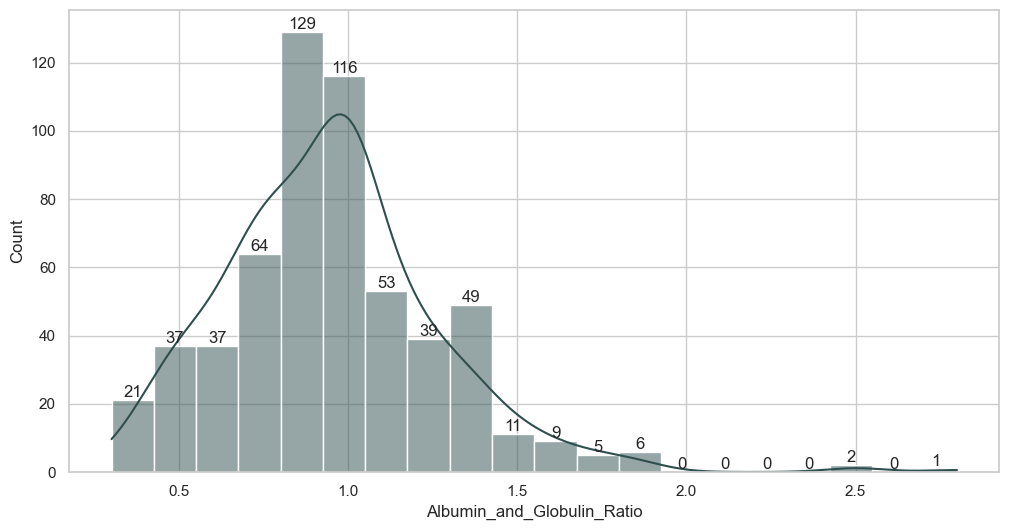

In [22]:
plt.figure(figsize=(12,6))
g=sns.histplot(data['Albumin_and_Globulin_Ratio'],bins=20,kde=True,color='darkslategrey')
for i in g.containers:
    g.bar_label(i)

**При пациентите под 30 годишна възраст, делът на болните е 64, а на здравите - 50**

In [23]:
data[(data['Age']<=30)]['Dataset'].value_counts()

Dataset
0    64
1    50
Name: count, dtype: int64

**При пациентите над 30 годишна възраст, делът на болните е 357, а на здравите - 118**

In [24]:
data[(data['Age']>=30)]['Dataset'].value_counts()

Dataset
0    357
1    118
Name: count, dtype: int64

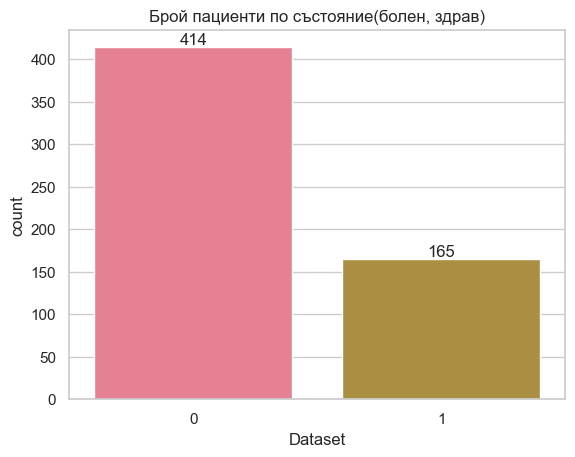

In [25]:
g=sns.countplot(data=data, x='Dataset')
for i in g.containers:
    plt.bar_label(i)
g.set(title='Брой пациенти по състояние(болен, здрав)')
plt.show()

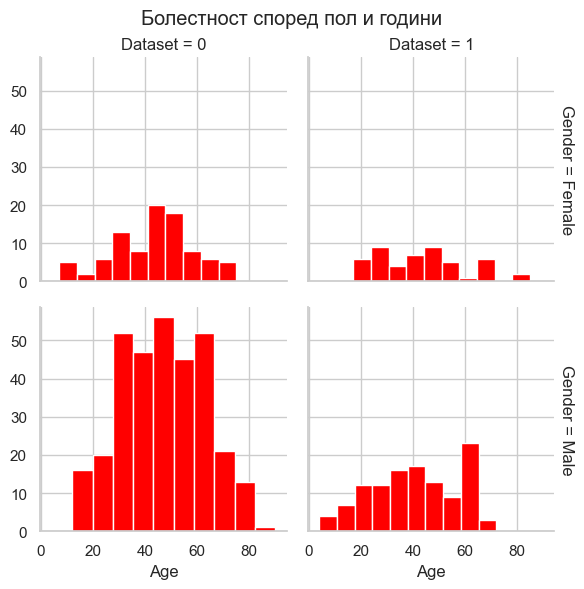

In [26]:
g = sns.FacetGrid(data, col="Dataset", row="Gender", margin_titles=True)
g.map(plt.hist, "Age", color="red")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Болестност според пол и години');

In [27]:
data[['Gender', 'Dataset','Age']].groupby(['Dataset','Gender'], as_index=False).count().sort_values(by='Dataset', ascending=False)

,Dataset,Gender,Age
2,1,Female,49
3,1,Male,116
0,0,Female,91
1,0,Male,323


In [28]:
data[['Gender', 'Dataset','Age']].groupby(['Dataset','Gender'], as_index=False).mean().sort_values(by='Dataset', ascending=False)

,Dataset,Gender,Age
2,1,Female,42.897959
3,1,Male,40.715517
0,0,Female,43.329670
1,0,Male,46.938080


**Годините изглежда са фактор за болестност при пациентите**

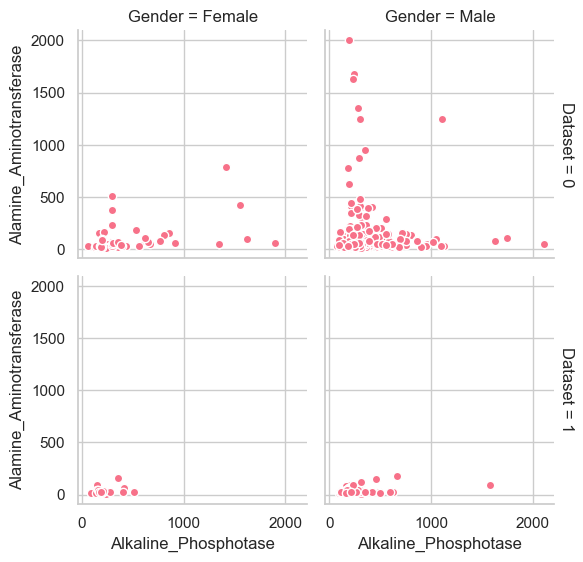

In [29]:
g = sns.FacetGrid(data, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Alkaline_Phosphotase", "Alamine_Aminotransferase",  edgecolor="w")
plt.subplots_adjust(top=0.9)

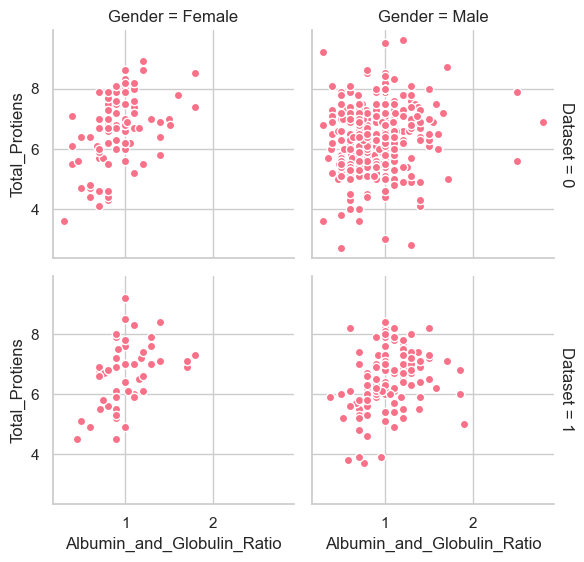

In [30]:
g = sns.FacetGrid(data, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Albumin_and_Globulin_Ratio", "Total_Protiens",  edgecolor="w")
plt.subplots_adjust(top=0.9)

## 4. Подготовка на данните за обучение на моделите.

**Преобразуваме категорийните текстови променливи - Gender - във фиктивни числови**

In [31]:
gender = pd.get_dummies(data['Gender'],drop_first=True)

In [32]:
data.drop(['Gender'], inplace=True, axis=1)

In [33]:
data=pd.concat([data,gender],axis=1)
data.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,0,False
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,0,True
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,0,True
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,0,True
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,0,True


**Разделяме набора на обучително и тестово множество в съотношение 70:30**

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
np.random.seed(101)
X_train, X_test, y_train, y_test=train_test_split(
    data.drop('Dataset', axis=1),data['Dataset'], test_size=0.3 )

## 5. Обучение на моделите.

### Logistic regression

In [36]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression(max_iter=550)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=550)

## Обучаваме по два модела с използване на всеки от алгоритмите - Decision Tree, Random Forest, XGBoost. Първият модел за всеки алгоритъм използва параметрите по подразбиране, а за втория намираме оптималните стойности на хипер-параметрите чрез изчерпателно или произволно търсене

### Decision Tree

#### Default Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier
dt1=DecisionTreeClassifier()
dt1.fit(X_train, y_train)

DecisionTreeClassifier()

#### Tuned tree

In [38]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [39]:
params={'max_depth':[3,5,7,10],
       'min_samples_leaf':[3,5,10,15],
       'ccp_alpha':[0,0.005,0.01]}

In [40]:
dt2=DecisionTreeClassifier()

In [41]:
dt2=GridSearchCV(dt2,params,cv=5,scoring='recall')

In [42]:
dt2.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0, 0.005, 0.01],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': [3, 5, 10, 15]},
             scoring='recall')

In [43]:
dt2.best_params_

{'ccp_alpha': 0, 'max_depth': 5, 'min_samples_leaf': 5}

### Random Forest

#### Default Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf1=RandomForestClassifier()
rf1.fit(X_train,y_train)

RandomForestClassifier()

#### Tuned Forest

In [45]:
params={'max_depth':[3,5,7,10],
       'min_samples_leaf':[3,5,10,15],
       'max_samples':[0.3,0.5,0.7,1.0],
       'n_estimators':[25,50,100,500]}

In [46]:
rf2=RandomForestClassifier()

In [47]:
rf2=GridSearchCV(rf2,params,cv=5,scoring='recall')

In [48]:
rf2.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7, 10],
                         'max_samples': [0.3, 0.5, 0.7, 1.0],
                         'min_samples_leaf': [3, 5, 10, 15],
                         'n_estimators': [25, 50, 100, 500]},
             scoring='recall')

In [49]:
rf2.best_params_

{'max_depth': 7, 'max_samples': 0.5, 'min_samples_leaf': 3, 'n_estimators': 25}

### XGBoost

#### Default XGBoost

In [50]:
from xgboost import XGBClassifier

In [51]:
xgb1=XGBClassifier()

In [52]:
xgb1.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

#### Tuned XGBoost

In [53]:
params={'gamma':[0,0.5,1,1.5],
       'learning_rate':[0.01,0.1,0.5,1],
       'max_depth':[3,5,10],
       'n_estimators':[50,100,500]}

In [54]:
xgb2=XGBClassifier()

In [55]:
xgb2=GridSearchCV(xgb2,params,cv=5,scoring='recall')

In [56]:
xgb2.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'gamma': [0, 0.5, 1, 1.5],
                         'learning_rate': [0.01, 0.1, 0.5, 1],
                         'max_depth': [3, 5, 10],
                         'n_estimators': [50, 100, 500]},
             scoring='recall')

In [57]:
xgb2.best_params_

{'gamma': 0.5, 'learning_rate': 1, 'max_depth': 3, 'n_estimators': 50}

## 6. Оценка на представяне на моделите

In [58]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score

#### Дефинираме функция model_reprot, която да извлича метриките за представянето на моделите от classification report.

In [59]:
def model_report(model,model_id, positive, negative):
    """
    model - trained model
    clr - classification report as dict
    positive - positive class
    negative - negative class
    """
    
    clr=classification_report(y_test,model.predict(X_test),output_dict=True)
    data={'model':str(model),
        'sensitivity':clr[str(positive)]['recall'],
         'specificity':clr[str(negative)]['recall'],
         'f1 score':clr[str(positive)]['f1-score'],
         'accuracy':clr['accuracy'],
         'balanced accuracy':clr['macro avg']['recall'],
          'auc':roc_auc_score(y_test,model.predict_proba(X_test)[:,1])
         }
    return pd.DataFrame(data=data, index=[model_id])

#### Дефинираме списък с обучените модели и потребителски етикети.

In [60]:
models=pd.DataFrame(data={'model':[log_model,dt1,dt2,rf1,rf2,xgb1,xgb2],
                         'model id':['LogReg','DT default', 'DT tuned','RF default','RF tuned','XG default','XG tuned']})

#### Създаваме dataframe report чрез прилагаме на функцията models.

In [61]:
report=pd.DataFrame()
for item in models.index:
    model=models['model'][item]
    model_id=models['model id'][item]
    report=pd.concat([report,model_report(model,model_id,1,0)])

report

,model,sensitivity,specificity,f1 score,accuracy,balanced accuracy,auc
LogReg,LogisticRegression(max_iter=550),0.36,0.887097,0.439024,0.735632,0.623548,0.739032
DT default,DecisionTreeClassifier(),0.56,0.806452,0.549020,0.735632,0.683226,0.683226
DT tuned,"GridSearchCV(cv=5, estimator=DecisionTreeClass...",0.62,0.717742,0.534483,0.689655,0.668871,0.729677
RF default,RandomForestClassifier(),0.40,0.879032,0.470588,0.741379,0.639516,0.762984
RF tuned,"GridSearchCV(cv=5, estimator=RandomForestClass...",0.36,0.862903,0.423529,0.718391,0.611452,0.754677
XG default,"XGBClassifier(base_score=None, booster=None, c...",0.44,0.830645,0.473118,0.718391,0.635323,0.770645
XG tuned,"GridSearchCV(cv=5,\n estimator=XGB...",0.32,0.830645,0.367816,0.683908,0.575323,0.701855


### Сравняване на моделите.

##### по различни метрики - balanced accuracy, AUC, sensitivity, specificity

In [62]:
sns.set_theme(style='whitegrid',palette='hls')

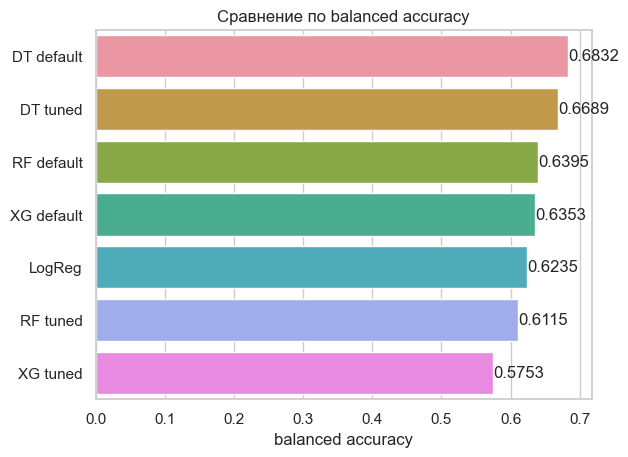

In [63]:
g=sns.barplot(data=report.sort_values('balanced accuracy',ascending=False),
            y=report.sort_values('balanced accuracy',ascending=False).index,
            x='balanced accuracy')
g.set(title='Сравнение по balanced accuracy')
for i in g.containers:
    g.bar_label(i,fmt='%.4f')

#### С най-висока балансирана точност е моделът DT default.

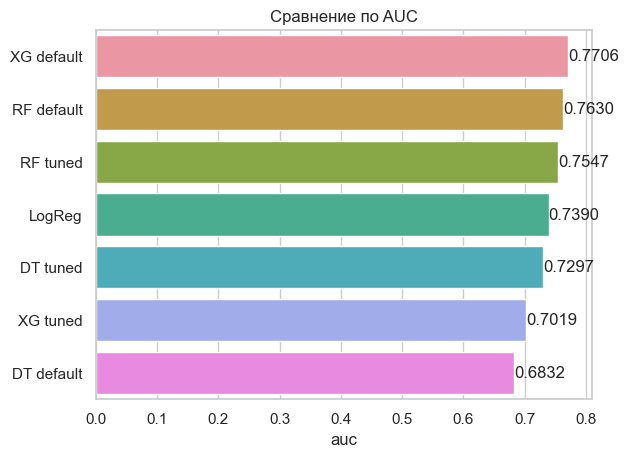

In [64]:
g=sns.barplot(data=report.sort_values('auc',ascending=False),
            y=report.sort_values('auc',ascending=False).index,
            x='auc')
g.set(title='Сравнение по AUC')
for i in g.containers:
    g.bar_label(i,fmt='%.4f')

#### С най-висока AUC е моделът XG default.

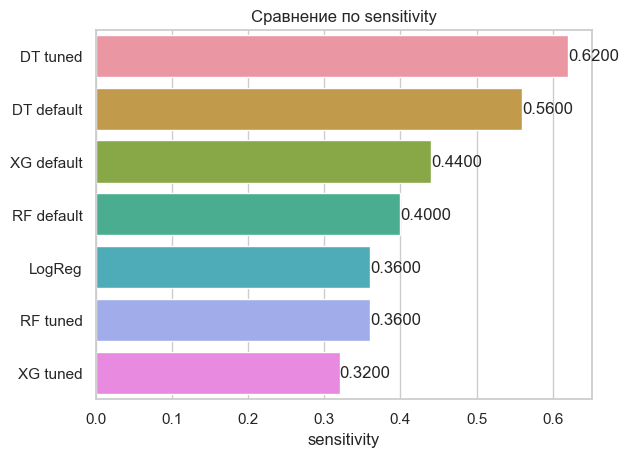

In [65]:
g=sns.barplot(data=report.sort_values('sensitivity',ascending=False),
            y=report.sort_values('sensitivity',ascending=False).index,
            x='sensitivity')
g.set(title='Сравнение по sensitivity')
for i in g.containers:
    g.bar_label(i,fmt='%.4f')

#### С най-висока чувствителност е моделът DT tuned.

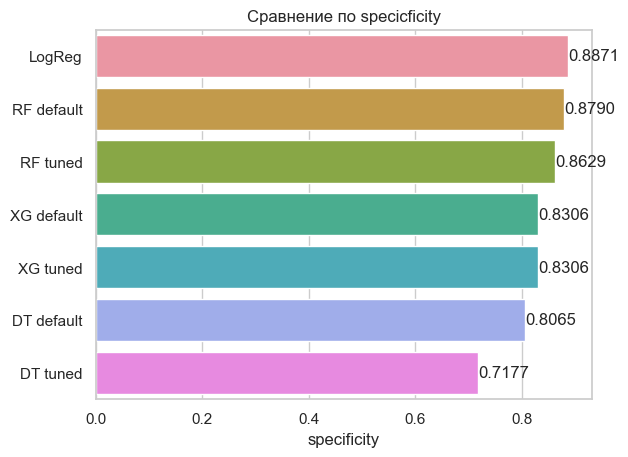

In [66]:
g=sns.barplot(data=report.sort_values('specificity',ascending=False),
            y=report.sort_values('specificity',ascending=False).index,
            x='specificity')
g.set(title='Сравнение по specicficity')
for i in g.containers:
    g.bar_label(i,fmt='%.4f')

#### С най-висока специфичност е моделът LogReg с оптимални стойности на хипер-параметрите.

### От направеното сравнение по различни метрики за представяне можем да заключим, че най-добрият модел е DT Tuned с параметри по подразбиране. В част "Интерпретиране на моделите" ще обясним прогнозите от този модел.

## Интерпретиране на моделите.

### Variable importance.

#### Избираме модела с оптимизирани стойности на параметрите.

In [67]:
best=dt2.best_estimator_

#### Изчисляваме относителна значимост на факторните променливи.

In [68]:
features=pd.DataFrame(data={'feature':list(X_test.columns),'importance':list(best.feature_importances_)})
features.sort_values('importance', ascending=False, inplace=True)
features

,feature,importance
2,Direct_Bilirubin,0.326212
3,Alkaline_Phosphotase,0.204098
0,Age,0.176536
5,Aspartate_Aminotransferase,0.157691
4,Alamine_Aminotransferase,0.135462
1,Total_Bilirubin,0.000000
6,Total_Protiens,0.000000
7,Albumin,0.000000
8,Albumin_and_Globulin_Ratio,0.000000
9,Male,0.000000


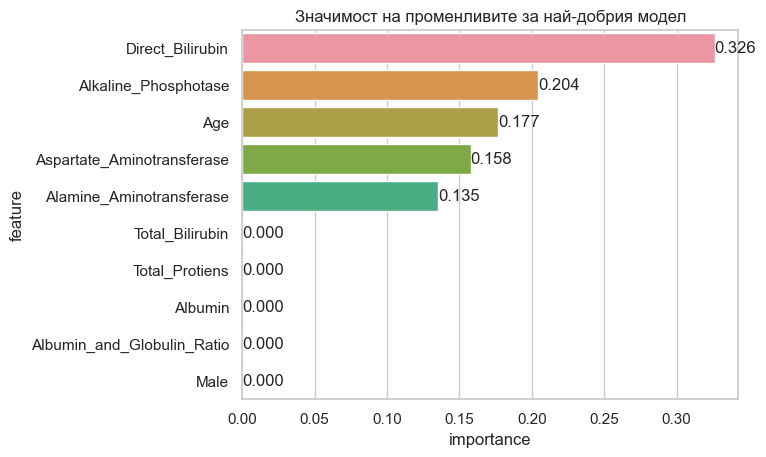

In [69]:
g=sns.barplot(x='importance',y='feature',data=features)
for i in g.containers:
    g.bar_label(i,fmt='%.3f')
g.set_title('Значимост на променливите за най-добрия модел')
plt.show()

#### С най-голяма относителна значимост е факторът директен билирубин (Direct_Bilirubin), на второ място е алкалната фосфотаза(Alkaline_Phosphotase), а на трето - възраст(Age). С най-ниска относителна значимост са факторите Total_Bilirubin, Total_Protiens, Albumin, Albumin_and_Globulin_Ratio, Male.

## SHAP summary plot

#### Обяснение на глобално ниво.

In [70]:
import shap
shap.initjs()

In [71]:
explainer=shap.TreeExplainer(best)

In [72]:
shap_obj=explainer(X_test)

In [73]:
shap_values=explainer.shap_values(X_test)

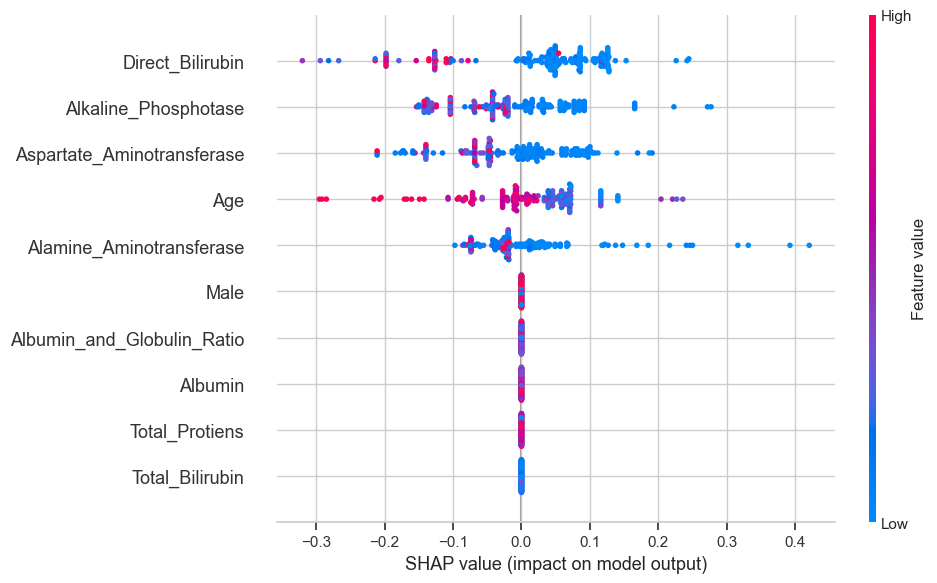

In [74]:
shap.summary_plot(shap_values=np.take(shap_obj.values,1,axis=-1),
                 features=X_test,
                 feature_names=list(X_test.columns), plot_size=(10,6))

**Разчитане:**

* Най-голям принос за статуса на пациента има неговият директен билирубин. В червено са оцветени случаи, при male=1, а в синьо male=0 (female). Стойността на male=1 допринася в най-силна степен за Dataset=0, т.е. болен пациент. Стойността на male=0 допринася за прогноза Dataset=1, т.е. здрав пациент
* На второ място по принос е алкалната фосфотаза (Alkaline_Phosphotase). Високите стойности на алкалната фосфотаза (Alkaline_Phosphotase) допринасят за положителна прогноза (Dataset=1), докато по-ниските - за отрицателна (Dataset=0)
* На трето място по принос е аспартановата аминотрансфераза(Aspartane_Aminotransferase). По-ниските стойности на Aspartane_Aminotransferase допринасят за Dataset=1, докато по-високите - за Dataset=0
* При фактора възраст (Age) не се забелязва ясно влияние върху целевата променлива, но може да се отбележи силното влияние на по-ниските стойности на възраст по отношение на Dataset=1
* По-високите стойности на аламиновата аминотрансфераза(Alamine_Aminotransferase) допринася за положителна прогноза (Dataset=1)
* Останалите стойности като цяло не оказват силно влияние върху генерираните прогнози



## Обяснение на индивидуални прогнози

#### Обяснение на прогноза за случай с индекс 0 от тестовото множество.

In [75]:
X_test.iloc[0, :]

Age                              22
Total_Bilirubin                 6.7
Direct_Bilirubin                3.2
Alkaline_Phosphotase            850
Alamine_Aminotransferase        154
Aspartate_Aminotransferase      248
Total_Protiens                  6.2
Albumin                         2.8
Albumin_and_Globulin_Ratio      0.8
Male                          False
Name: 485, dtype: object

In [76]:
y_test.iloc[0]

0

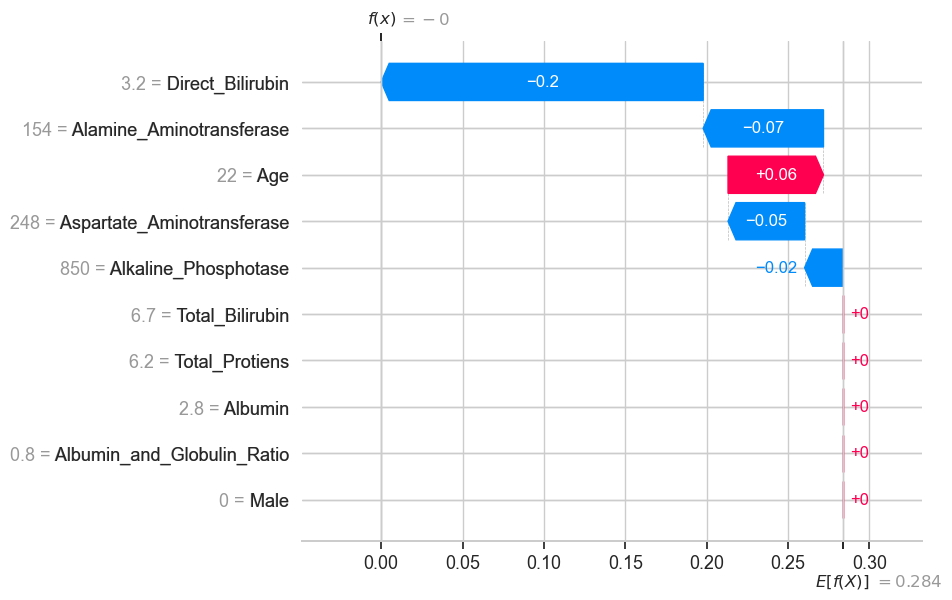

In [77]:
shap.waterfall_plot(shap_obj[0][:,1])

## Моделът е генерирал прогноза (Dataset=0), което е вярна отрицателна прогноза. С най-голям принос за тази прогноза за факторите Direct_Bilirubin, Alamine_Aminotransferase, Age, Asperate_Aminotransferase.

#### Обяснение на прогноза за случай с индекс 3 от тестовото множество.

In [81]:
X_test.iloc[4, :]

Age                             40
Total_Bilirubin                0.7
Direct_Bilirubin               0.2
Alkaline_Phosphotase           176
Alamine_Aminotransferase        28
Aspartate_Aminotransferase      43
Total_Protiens                 5.3
Albumin                        2.4
Albumin_and_Globulin_Ratio     0.8
Male                          True
Name: 365, dtype: object

In [82]:
y_test.iloc[4]

1

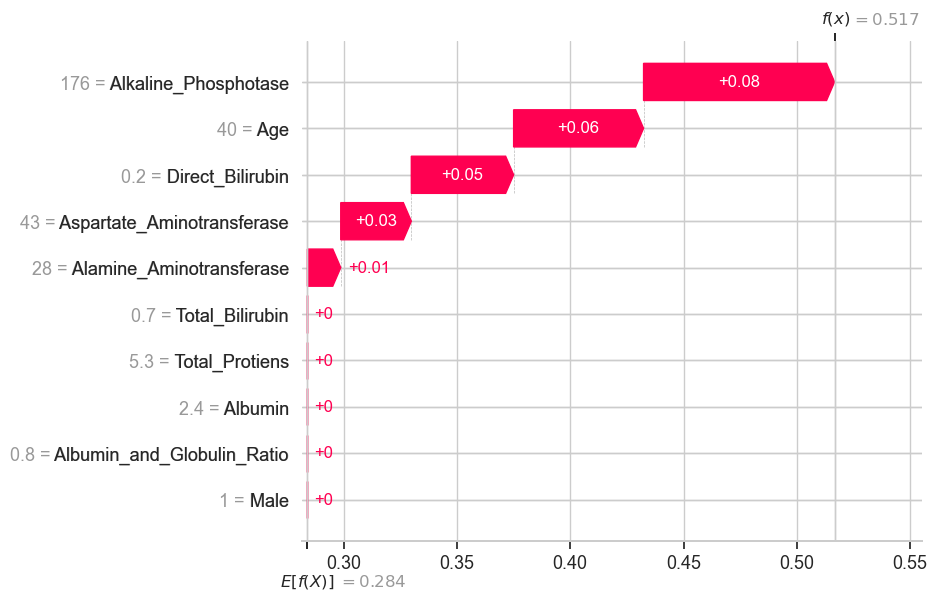

In [83]:
shap.waterfall_plot(shap_obj[4][:,1])

#### Разчитане

Моделът е генерирал положителна прогноза (Dataset=1), което е вярна положителна прогноза. С най-голям принос за тази прогноза е Alkaline_Phosphotase, 
Age, Direct_Bilirubin, Asperate_Aminotransferase, Alamine_Aminotransferase.plot